# Machine learning modeling of housing data set to predict prices based on a number of variables
 * Submission for Housing Prices Competition for Kaggle 
 * [Kaggle data set](https://www.kaggle.com/competitions/home-data-for-ml-course/overview)



In [99]:
import pandas as pd 
import seaborn as sb 
sb.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import os
from pathlib import Path


In [97]:
pwd = os.getcwd()

In [95]:
df_train = pd.read_csv('/Users/johnkim/Projects/Kaggle/train.csv')
df_test = pd.read_csv('/Users/johnkim/Projects/Kaggle/test.csv')

In [75]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [76]:
print(df_train.shape)
print(df_test.shape)

df_train.info()


(1460, 81)
(1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null  

# Exploratory Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

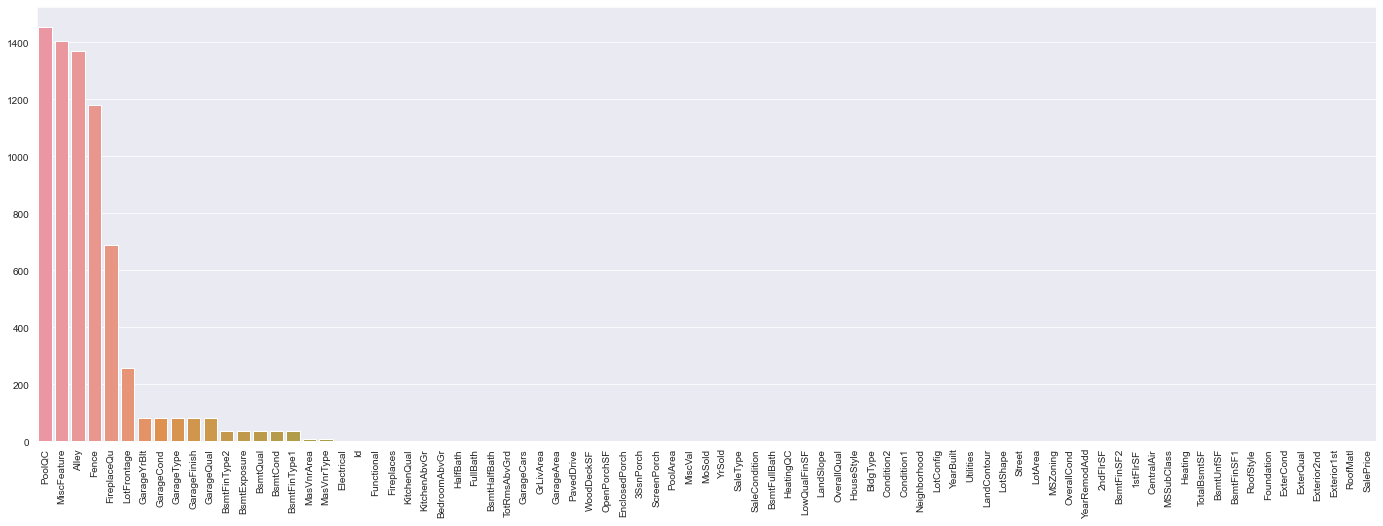

In [77]:
# columns with the most null values
cols_with_null=df_train.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(24,8))
sb.barplot(x=cols_with_null.index,y=cols_with_null)
plt.xticks(rotation=90)
plt.show

In [51]:
# Fill in null values for columns with no values
df_train.fillna('unknown', inplace=True)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,unknown,Reg,Lvl,AllPub,...,0,unknown,unknown,unknown,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,unknown,Reg,Lvl,AllPub,...,0,unknown,unknown,unknown,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,unknown,IR1,Lvl,AllPub,...,0,unknown,unknown,unknown,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,unknown,IR1,Lvl,AllPub,...,0,unknown,unknown,unknown,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,unknown,IR1,Lvl,AllPub,...,0,unknown,unknown,unknown,0,12,2008,WD,Normal,250000


## Shortlisting important features

In [79]:
important_features=['YearBuilt','LotArea','OverallQual','OverallCond','GrLivArea','1stFlrSF','2ndFlrSF','BedroomAbvGr','OpenPorchSF','PoolArea','SalePrice']
df_train[important_features].describe()

,YearBuilt,LotArea,OverallQual,OverallCond,GrLivArea,1stFlrSF,2ndFlrSF,BedroomAbvGr,OpenPorchSF,PoolArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1971.267808,10516.828082,6.099315,5.575342,1515.463699,1162.626712,346.992466,2.866438,46.660274,2.758904,180921.195890
std,30.202904,9981.264932,1.382997,1.112799,525.480383,386.587738,436.528436,0.815778,66.256028,40.177307,79442.502883
min,1872.000000,1300.000000,1.000000,1.000000,334.000000,334.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,1954.000000,7553.500000,5.000000,5.000000,1129.500000,882.000000,0.000000,2.000000,0.000000,0.000000,129975.000000
50%,1973.000000,9478.500000,6.000000,5.000000,1464.000000,1087.000000,0.000000,3.000000,25.000000,0.000000,163000.000000
75%,2000.000000,11601.500000,7.000000,6.000000,1776.750000,1391.250000,728.000000,3.000000,68.000000,0.000000,214000.000000
max,2010.000000,215245.000000,10.000000,9.000000,5642.000000,4692.000000,2065.000000,8.000000,547.000000,738.000000,755000.000000


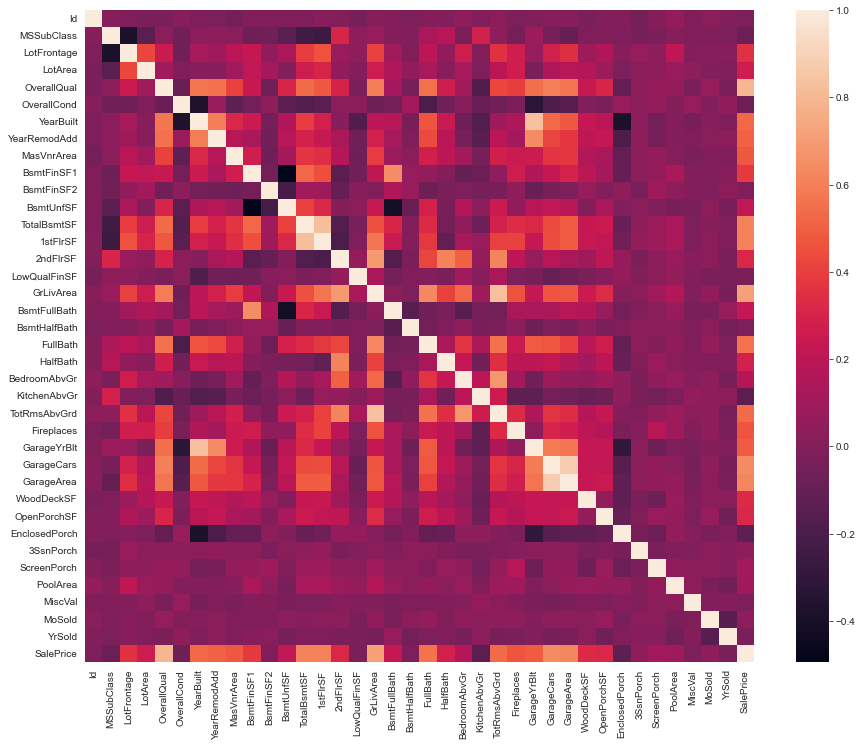

In [80]:
plt.figure(figsize=(15,12))
sb.heatmap(df_train.corr())
plt.show()

## Finding the outliers

<AxesSubplot:xlabel='SalePrice'>

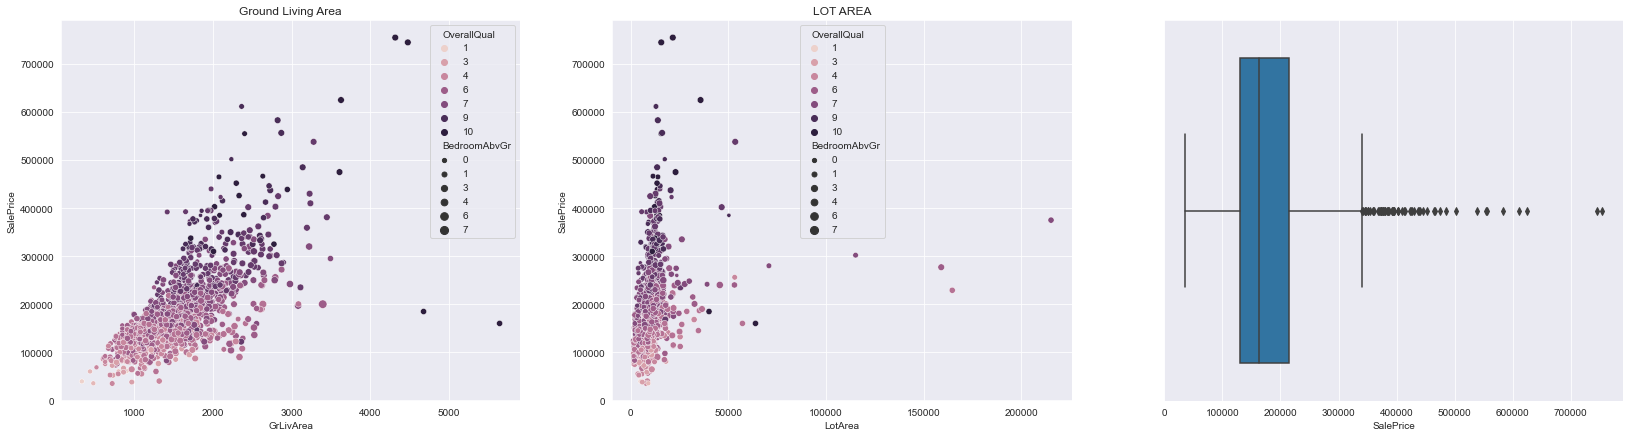

In [81]:
fig, ax=plt.subplots(1,3,figsize=(28,7))

# Ground Living Area versus Sales Price
sb.scatterplot(x=df_train.GrLivArea,y=df_train.SalePrice,size=df_train.BedroomAbvGr,hue=df_train.OverallQual, ax=ax[0])
ax[0].set_title("Ground Living Area")
# Lot Area versus Sales Price
sb.scatterplot(x=df_train.LotArea,y=df_train.SalePrice,size=df_train.BedroomAbvGr,hue=df_train.OverallQual, ax=ax[1])
ax[1].set_title("LOT AREA")

# Low and high housing prices
sb.boxplot(x=df_train.SalePrice)

The 99.5% quantile: 527331.9149999974
Quantile here measures the housing price where 99.5% of prices fall below. Any price equal to or greater than this is an extreme outlier.


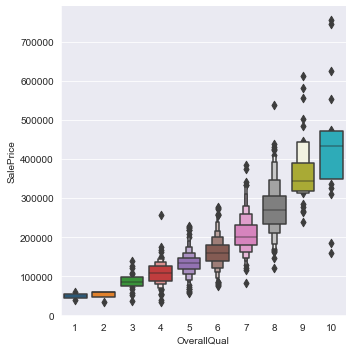

In [82]:
sb.catplot(data=df_train, y='SalePrice', x='OverallQual', kind="boxen"); # mutli col box and whisker plots.

upper_quantile = df_train['SalePrice'].quantile(0.995)
print('The 99.5% quantile: ' + str(upper_quantile))
print('Quantile here measures the housing price where 99.5% of prices fall below. Any price equal to or greater than this is an extreme outlier.')


In [83]:
# Removing price outliers from data set
price_outliers =df_train[df_train['SalePrice']> upper_quantile].index
df_train.drop(price_outliers,inplace=True)

df_train.shape


(1452, 81)

In [84]:
# Removing ground living area outliers from data set
ground_area_outliers=df_train[df_train['GrLivArea']>4000].index
df_train.drop(ground_area_outliers,inplace=True)

df_train.shape

(1450, 81)

In [85]:
# Removing lot area outliers from data set
lot_area_outliers=df_train[df_train['LotArea']>100000].index
df_train.drop(lot_area_outliers,inplace=True)

df_train.shape

(1446, 81)

## Prepping data for modeling

In [86]:
X_train = df_train.drop(['Id','SalePrice'],axis=1)
y_train = df_train.SalePrice
X_test = df_test.drop(['Id'],axis=1)

In [88]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

In [89]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_cols), ('cat', categorical_transformer, categorical_cols)])

## Modeling

In [90]:
from sklearn.ensemble import RandomForestClassifier

model_GBR =  GradientBoostingRegressor(n_estimators=1100, loss='squared_error', subsample = 0.35, learning_rate = 0.05,random_state=1)
GBR_Pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model_GBR)])
GBR_Pipeline.fit(X_train, y_train)
preds_GBR = GBR_Pipeline.predict(X_test)

In [102]:
final_df = pd.DataFrame({'Id': df_test.Id,'SalePrice': preds_GBR})


In [101]:
final_df.head()

,Id,SalePrice
0,1461,129342.816129
1,1462,166620.120890
2,1463,193674.049572
3,1464,192106.119131
4,1465,190898.952934


In [100]:
filepath = Path(pwd + 'submission.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
final_df.to_csv('submission.csv', index=False)